# Deep Learning 1 to 6
## Pavithiran V

# WEEK-2 I. IMAGE CLASSIFICATION
#### a. BASIC IMAGE CLASSIFICATION USING CIFAR-10 DATASET

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


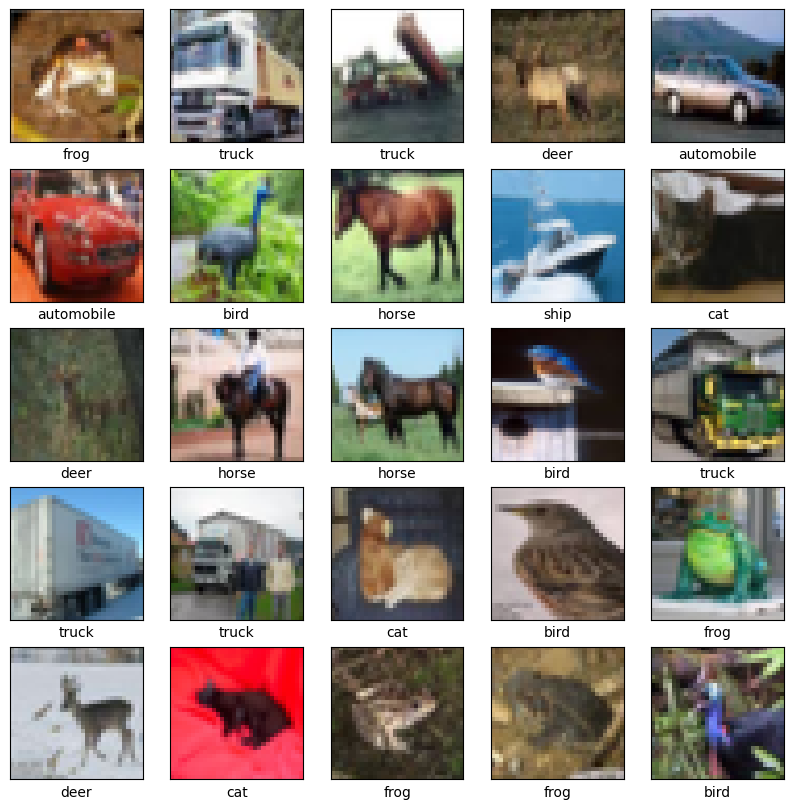

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


I0000 00:00:1729237214.400984     118 service.cc:145] XLA service 0x7be584005930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729237214.401033     118 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729237214.401037     118 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  72/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1213 - loss: 2.2728

I0000 00:00:1729237217.163136     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3463 - loss: 1.7557 - val_accuracy: 0.5559 - val_loss: 1.2500
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5730 - loss: 1.1991 - val_accuracy: 0.6225 - val_loss: 1.0677
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6427 - loss: 1.0204 - val_accuracy: 0.6375 - val_loss: 1.0350
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6761 - loss: 0.9222 - val_accuracy: 0.6711 - val_loss: 0.9293
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7032 - loss: 0.8421 - val_accuracy: 0.6858 - val_loss: 0.9035
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7309 - loss: 0.7611 - val_accuracy: 0.6792 - val_loss: 0.9302
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7482 - loss: 0.7188 - val_accuracy: 0.7168 - val_loss: 0.8506
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7674 - loss: 0.6625 - val_accura

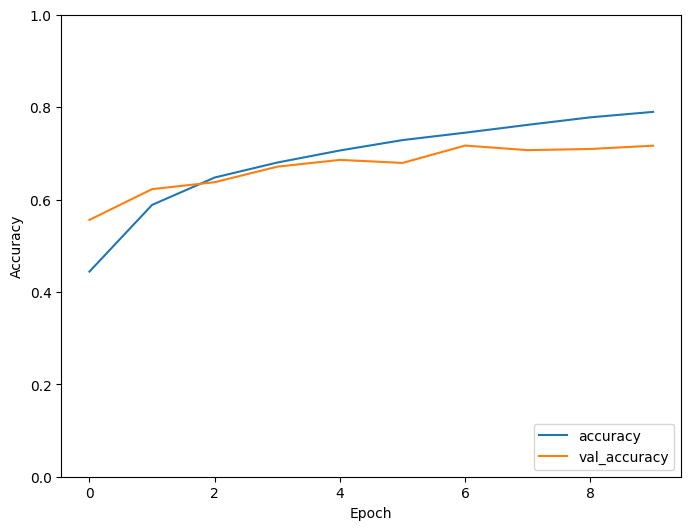

In [4]:
# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and Preprocess the Data
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Visualize the Data
# Class names in the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot Training History
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


#### b. HANDWRITTEN DIGIT RECOGNITION USING CNNS (MNIST DATASET)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8940 - loss: 0.3389 - val_accuracy: 0.9863 - val_loss: 0.0453
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9842 - loss: 0.0493 - val_accuracy: 0.9852 - val_loss: 0.0446
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9889 - loss: 0.0335 - val_accuracy: 0.9913 - val_loss: 0.0292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9920 - loss: 0.0246 - val_accuracy: 0.9878 - val_loss: 0.0406
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9902 - val_loss: 0.0308
313/313 - 0s - 1ms/step - accuracy: 0.9902 - loss: 0.0308

Test accuracy: 0.9901999831199646


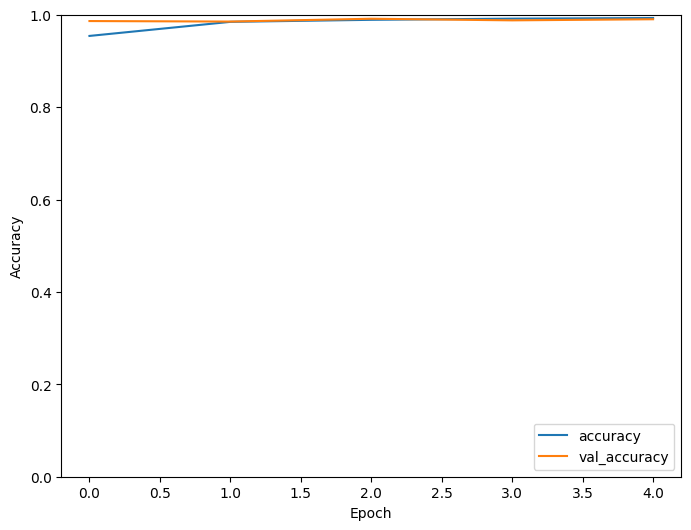

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


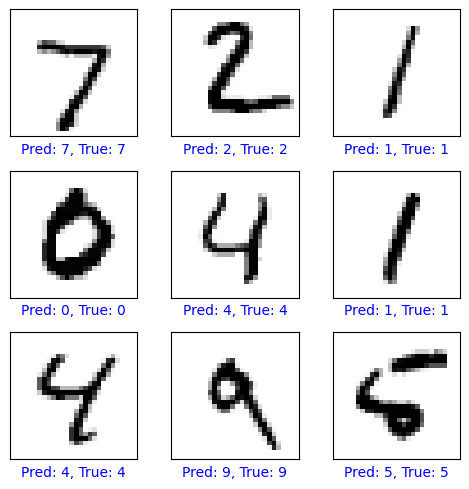

In [3]:
# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
# Load and Preprocess the Data
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data to fit the model
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot Training History
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

predictions = model.predict(test_images)

# Function to plot image with prediction and true label
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.squeeze(), cmap=plt.cm.binary)  # Remove extra dimension
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color=color)

# Plot few test images with their predictions
plt.figure(figsize=(5, 5))
for i in range(9):  # Display first 9 images
    plt.subplot(3, 3, i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()

#### c. FINE-TUNING PRE-TRAINED MODELS FOR CAT VS. DOG CLASSIFICATION

Found 555 files belonging to 2 classes.
Found 138 files belonging to 2 classes.


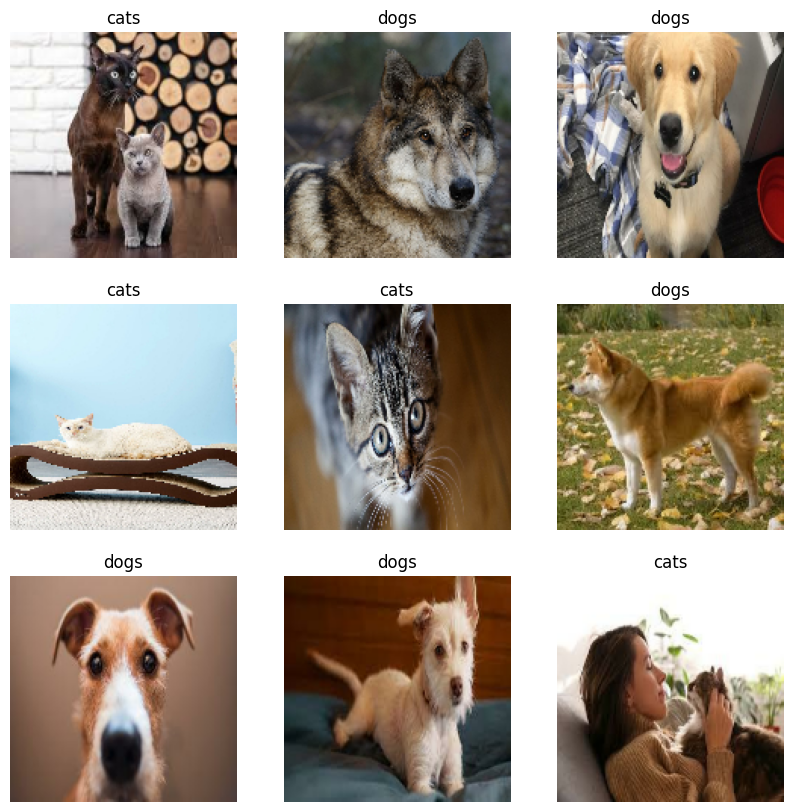

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 597ms/step - accuracy: 0.7355 - loss: 8.5724 - val_accuracy: 0.8841 - val_loss: 5.5984
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9130 - loss: 2.6387 - val_accuracy: 0.8551 - val_loss: 4.4104
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9632 - loss: 0.9359 - val_accuracy: 0.8406 - val_loss: 5.7356
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9680 - loss: 0.8487 - val_accuracy: 0.8768 - val_loss: 4.1813
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9808 - loss: 0.1109 - val_accuracy: 0.8551 - val_loss: 4.8925
Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 34s 787ms/step - accuracy: 0.9720 - loss: 0.6735 - val_accuracy: 0.8261 - val_loss: 3.7637
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.9887 - loss: 0.2088 - val_accuracy: 0.8116 - val_loss: 3.7555
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy:

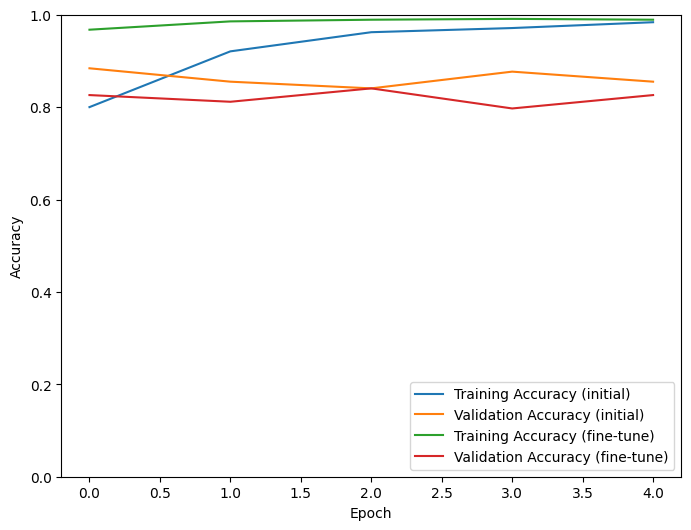

In [6]:
# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# Load and Preprocess the Data
# Define paths to the train and validation datasets
train_dir = '/kaggle/input/catcat/train'
val_dir = '/kaggle/input/catcat/test'

# Load the Cats vs. Dogs dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
)

# Define the class names
class_names = train_dataset.class_names

# Visualize the Data
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
plt.show()

# Build the Model Using a Pre-trained Base
base_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5)

# Fine-Tune the Model (Optional)
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

fine_tune_history = model.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=5)

# Evaluate the Model
val_loss, val_acc = model.evaluate(val_dataset, verbose=2)
print(f'\nValidation accuracy: {val_acc}')

# Plot Training History
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy (initial)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (initial)')
plt.plot(fine_tune_history.history['accuracy'], label='Training Accuracy (fine-tune)')
plt.plot(fine_tune_history.history['val_accuracy'], label='Validation Accuracy (fine-tune)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# Week 3

## a.Basic Object Detection Using OpenCV and Haar Cascades


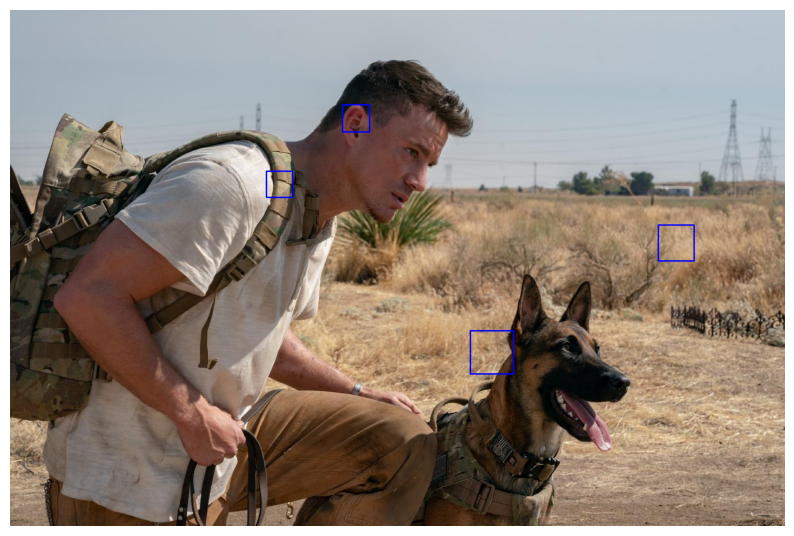

In [7]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread('/kaggle/input/catcat/train/dogs/dog_10.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### b

In [8]:
!pip install opencv-python-headless
!pip install numpy

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [9]:
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -O yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names

--2024-10-18 07:43:48--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: 'yolov3.weights'

yolov3.weights      100%[===================>] 236.52M  9.53MB/s    in 19s     

2024-10-18 07:44:08 (12.5 MB/s) - 'yolov3.weights' saved [248007048/248007048]

--2024-10-18 07:44:09--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: 'yolov3.cfg'

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

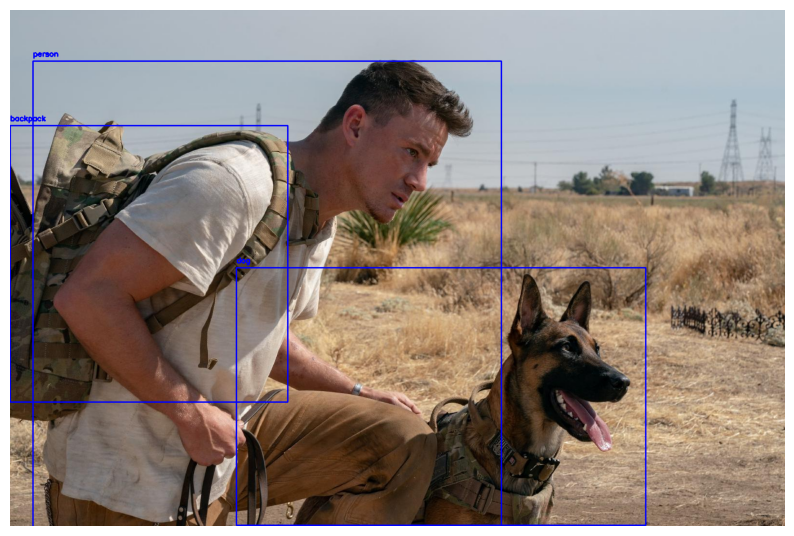

In [10]:
import cv2
import numpy as np

net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
with open('coco.names', 'r') as f:
    classes = f.read().strip().split('\n')
    
img = cv2.imread('/kaggle/input/catcat/train/dogs/dog_10.jpg')
height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


## C.  MASK R-CNN FOR INSTANCE SEGMENTATION

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:00<00:00, 191MB/s]  


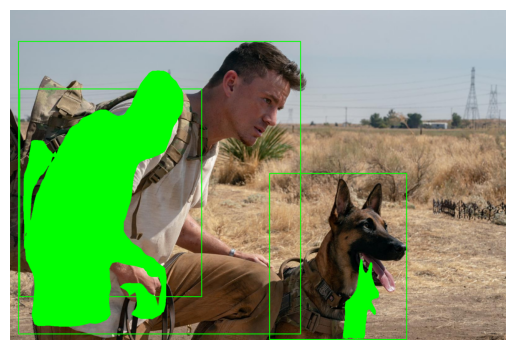

In [11]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Install necessary packages (for local execution)
# !pip install torch torchvision

# Load a pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the image
image = cv2.imread("/kaggle/input/catcat/train/dogs/dog_10.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Transform the image to a tensor
image_tensor = F.to_tensor(image_rgb)

# Add a batch dimension
image_tensor = image_tensor.unsqueeze(0)

# Perform inference
with torch.no_grad():
    outputs = model(image_tensor)

# Get the masks, boxes, and labels
masks = outputs[0]['masks']
boxes = outputs[0]['boxes']
labels = outputs[0]['labels']
scores = outputs[0]['scores']

# Set the confidence threshold
conf_threshold = 0.5

# Loop over the detections
for i in range(len(masks)):
    if scores[i] > conf_threshold:
        # Extract the mask and bounding box
        mask = masks[i, 0].mul(255).byte().cpu().numpy()
        box = boxes[i].cpu().numpy().astype(int)
        label = labels[i].cpu().numpy()

        # Apply the mask to the image
        mask = cv2.resize(mask, (box[2] - box[0], box[3] - box[1]))
        mask = mask > 128

        roi = image[box[1]:box[3], box[0]:box[2]]
        roi[mask] = [0, 255, 0]

        # Draw the bounding box
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

# Convert BGR image to RGB for displaying with matplotlib
output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the output image using matplotlib
plt.imshow(output_image)
plt.axis('off')  # Hide the axis
plt.show()


# Week 4

# a. BASIC OBJECT CLASSIFICATION USING PRE-TRAINED VGG16 MODEL

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.4729 - loss: 3.2626 - val_accuracy: 0.6069 - val_loss: 1.1727
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6054 - loss: 1.1416 - val_accuracy: 0.6355 - val_loss: 1.0707
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6307 - loss: 1.0713 - val_accuracy: 0.6439 - val_loss: 1.0573
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6427 - loss: 1.0278 - val_accuracy: 0.6368 - val_loss: 1.1076
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6468 - loss: 1.0105 - val_accuracy: 0.6465 - val_loss: 1.0636
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6428 - loss: 1.0651
Test Accuracy: 64.39%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


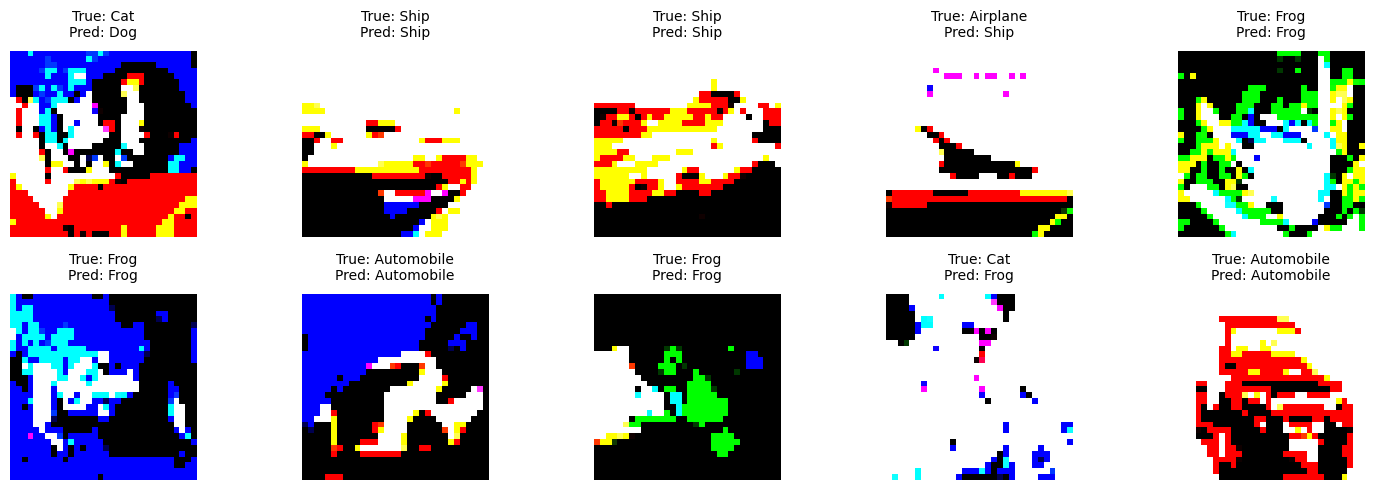

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Load the VGG16 model without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Preprocess the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

# Create data generators for data augmentation
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data=(x_test, y_test), epochs=5, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict classes for the test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Class names for CIFAR-10
class_names = [
    'Airplane',
    'Automobile',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck'
]

# Display some images with their predicted and true classes
def plot_predictions(images, true_labels, predicted_labels):
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        # Adjust the title for better spacing
        plt.title(f'True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}', fontsize=10, pad=10)
        plt.axis('off')
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# Show the first 10 test images with their predicted and true labels
plot_predictions(x_test, true_classes, predicted_classes)


# b. IMAGENET CLASSIFICATION WITH DEEP RESIDUAL NETWORKS (RESNET)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


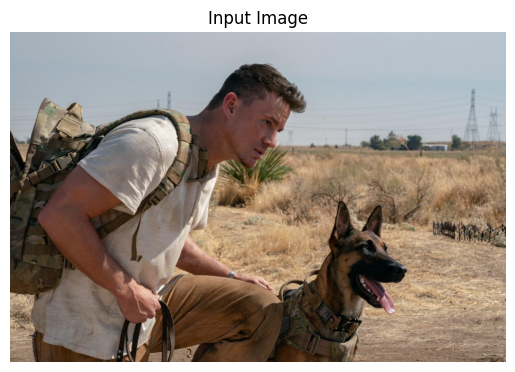

1: malinois (0.80)
2: muzzle (0.05)
3: German_shepherd (0.04)
4: Arabian_camel (0.03)
5: whippet (0.02)
6: horse_cart (0.01)
7: Great_Dane (0.01)
8: Scotch_terrier (0.00)
9: groenendael (0.00)
10: sorrel (0.00)


In [13]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

model = ResNet50(weights='imagenet')
img_path = '/kaggle/input/catcat/train/dogs/dog_10.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = model.predict(x)
decoded_predictions = decode_predictions(predictions, top=10)[0]
img_pil = Image.open(img_path)  # Open the original image using PIL
plt.imshow(img_pil)
plt.axis('off')  # Hide axes
plt.title('Input Image')
plt.show()
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


# C. CLASSIFYING SPECIES OF FLOWERS USING TRANSFER LEARNING

In [14]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# Set up data directories
train_dir = '/kaggle/input/flower-classification-5-classes-roselilyetc/Flower Classification/Flower Classification/Testing Data'
valid_dir = '/kaggle/input/flower-classification-5-classes-roselilyetc/Flower Classification/Flower Classification/Training Data'

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224),
                                                    batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(224, 224),
                                                    batch_size=32, class_mode='categorical')

# Load the pre-trained VGG16 model without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(train_generator, epochs=5, validation_data=valid_generator, callbacks=[early_stopping])

# Evaluate the model on validation data
loss, accuracy = model.evaluate(valid_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


Found 958 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.
Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.4431 - loss: 3.2301 - val_accuracy: 0.6522 - val_loss: 0.9973
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 842ms/step - accuracy: 0.8372 - loss: 0.4210 - val_accuracy: 0.7710 - val_loss: 0.6803
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 823ms/step - accuracy: 0.9683 - loss: 0.1342 - val_accuracy: 0.7534 - val_loss: 0.7349
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 797ms/step - accuracy: 0.9974 - loss: 0.0563 - val_accuracy: 0.7516 - val_loss: 0.7538
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 810ms/step - accuracy: 0.9984 - loss: 0.0329 - val_accuracy: 0.7532 - val_loss: 0.7714
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.7778 - loss: 0.6608
Validation Accuracy: 77.10%


# Week 5

# A. BASIC TEXT CLASSIFICATION USING NAIVE BAYES AND BAG-OF-WORDS

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Dataset
data = pd.read_csv('/kaggle/input/newsarticlecategories/news-article-categories.csv')  # Assume CSV has two columns: 'headline' and 'category'

# Step 2: Split Dataset into Features (X) and Target (y)
X = data['category']  # Features (news headlines)
y = data['title']  # Labels (news categories)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Text Preprocessing - Bag-of-Words (BoW)
vectorizer = CountVectorizer()  # Convert text to BoW representation
X_train_bow = vectorizer.fit_transform(X_train)  # Fit and transform training data
X_test_bow = vectorizer.transform(X_test)  # Transform test data (use the same vocabulary as train data)

# Step 5: Build and Train Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

# Step 6: Predict on Test Data
y_pred = nb_model.predict(X_test_bow)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("Classification Report:")
# i have commented the below line code....because the result is big....remove the comment(#) and run
#print(classification_report(y_test, y_pred))

Accuracy: 0.36%
Classification Report:


# B. NEWS ARTICLE CATEGORIZATION USING BERT

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset with 'category', 'title', and 'body' columns
df = pd.read_csv('/kaggle/input/newsarticlecategories/news-article-categories.csv')

# Convert categories to numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

# Ensure the 'body' column contains strings (in case of NaNs or other issues)
df['body'] = df['body'].astype(str)

# Split the dataset into training and testing sets
train_texts, val_texts, train_labels, val_labels = train_test_split(df['body'], df['category'], test_size=0.2, random_state=42)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences
max_length = 128  # Maximum token length
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=max_length)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=max_length)

# Convert labels to tensors
train_labels = torch.tensor(train_labels.tolist())
val_labels = torch.tensor(val_labels.tolist())

# Convert encodings to tensors
train_input_ids = torch.tensor(train_encodings['input_ids'])
train_attention_masks = torch.tensor(train_encodings['attention_mask'])

val_input_ids = torch.tensor(val_encodings['input_ids'])
val_attention_masks = torch.tensor(val_encodings['attention_mask'])

# Create PyTorch dataset
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)

# Create DataLoader for efficient batch processing
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['category'].unique()))
model = model.to('cuda')  # If using a GPU

# Optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training Loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to('cuda') for b in batch]
        
        optimizer.zero_grad()
        
        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        
        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}, Loss: {avg_train_loss}')

# Evaluation
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_masks, labels = [b.to('cuda') for b in batch]
        
        outputs = model(input_ids, attention_mask=attention_masks)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy and other metrics
accuracy = accuracy_score(true_labels, predictions)
print(f'Validation Accuracy: {accuracy}')
print(classification_report(true_labels, predictions, target_names=le.classes_))

# Sample input and prediction
sample_text = "Researchers have discovered a new species of butterfly in the Amazon rainforest."
encoded_sample = tokenizer(sample_text, return_tensors='pt', truncation=True, padding=True, max_length=max_length)
encoded_sample = {key: value.to('cuda') for key, value in encoded_sample.items()}

# Predict category
model.eval()
with torch.no_grad():
    output = model(**encoded_sample)
    predicted_class = torch.argmax(output.logits, dim=1).item()

predicted_category = le.inverse_transform([predicted_class])
print(f'Predicted Category: {predicted_category[0]}')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Loss: 1.8782822763503983
Epoch 2, Loss: 0.8775909183503583
Epoch 3, Loss: 0.5539505350901637
Validation Accuracy: 0.7630813953488372
                precision    recall  f1-score   support

ARTS & CULTURE       0.93      0.72      0.81       206
      BUSINESS       0.72      0.70      0.71       116
        COMEDY       0.80      0.78      0.79        73
         CRIME       0.75      0.78      0.76        54
     EDUCATION       0.86      0.77      0.81       101
 ENTERTAINMENT       0.73      0.82      0.77        99
   ENVIRONMENT       0.87      0.78      0.82       110
         MEDIA       0.69      0.73      0.71        63
      POLITICS       0.69      0.75      0.72       102
      RELIGION       0.79      0.84      0.81        93
       SCIENCE       0.65      0.79      0.71        58
        SPORTS       0.85      0.95      0.90       100
          TECH       0.68      0.77      0.72        95
         WOMEN       0.57      0.58      0.58       106

      accuracy  

# C. SPAM DETECTION IN EMAIL USING LSTM NETWORKS

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8462 - loss: 0.4574 - val_accuracy: 0.8592 - val_loss: 0.4086
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8730 - loss: 0.3854 - val_accuracy: 0.8592 - val_loss: 0.4072
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8657 - loss: 0.4021 - val_accuracy: 0.8592 - val_loss: 0.4139
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8681 - loss: 0.3968 - val_accuracy: 0.8592 - val_loss: 0.4125
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8602 - loss: 0.4106 - val_accuracy: 0.8592 - val_loss: 0.4084
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test Accuracy: 85.92%
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       958
           1       0.00      0.00      0.00       157

    accuracy                           0.86      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.74      0.86      0.79      11

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


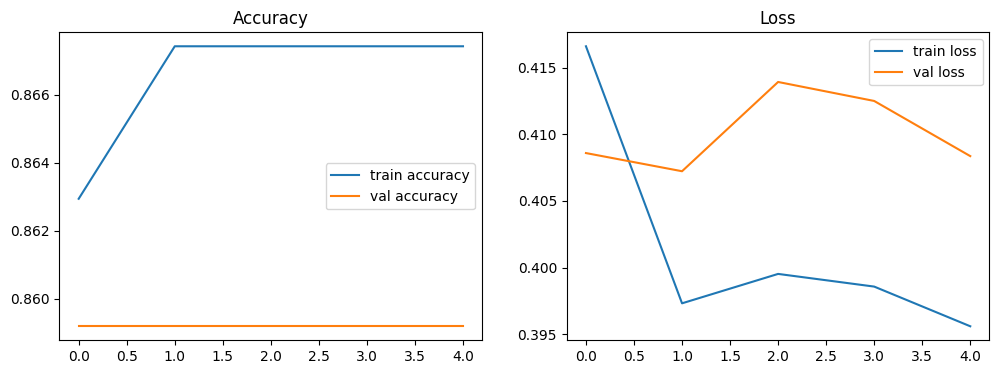

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
# Assuming dataset is in CSV format with columns 'category' and 'message'
data = pd.read_csv('/kaggle/input/spam-email-classification/email.csv')
data.columns = ['category', 'message']

# Encode labels: spam=1, ham=0
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])

# Preprocessing
X = data['message']
y = data['category']

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index

# Pad sequences to ensure uniform input size
max_len = 100
X_padded = pad_sequences(sequences, maxlen=max_len, padding='post')

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(word_index)+1, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Plot training and validation accuracy and loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()


# WEEK 6

## A. BASIC SENTIMENT ANALYSIS USING LOGISTIC REGRESSION

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
# Dataset should have 'text' and 'sentiment' columns
df = pd.read_csv('/kaggle/input/sentiment-analysis/sentiment_analysis.csv')

# Encode labels: positive=1, neutral=0, negative=-1
df['sentiment'] = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Convert text data to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Build the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Predict on the test data
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Example: Predict sentiment of new text
new_text = ["I love this!", "This is not good", "It's okay"]
new_text_vectorized = vectorizer.transform(new_text)
predictions = model.predict(new_text_vectorized)
print("Predictions (1 = positive, 0 = neutral, -1 = negative):", predictions)


Accuracy: 65.00%
              precision    recall  f1-score   support

    negative       0.75      0.58      0.66        36
     neutral       0.48      0.80      0.60        30
    positive       0.91      0.59      0.71        34

    accuracy                           0.65       100
   macro avg       0.71      0.66      0.66       100
weighted avg       0.72      0.65      0.66       100

Predictions (1 = positive, 0 = neutral, -1 = negative): [ 1 -1  0]


## b. TWITTER SENTIMENT ANALYSIS USING LSTM AND GLOVE EMBEDDINGS

In [19]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Load and preprocess the dataset
# Load the dataset
df = pd.read_csv('/kaggle/input/sentiment-analysis/sentiment_analysis.csv', on_bad_lines='skip')

# Check the structure of the dataframe
print(df.head())

# Check the distribution of sentiment labels
print("Sentiment distribution:")
print(df['sentiment'].value_counts())

# Clean text function
def clean_text(text):
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return text

# Apply cleaning to the 'SentimentText' column
df['cleaned_text'] = df['sentiment'].apply(clean_text)

# Convert sentiment labels to numerical format
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 2})  # Adjust based on your labeling scheme

# Step 2: Tokenize text and pad sequences
max_length = 100  # Maximum length of sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Step 3: Split data into training, validation, and testing sets
X = padded_sequences
y = df['sentiment'].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split the temp set into validation and test sets

# Step 4: Load pre-trained GloVe embeddings
embeddings_index = {}
glove_file = '/kaggle/input/glove6b100dtxt/glove.6B.100d.txt'  # Adjust the path to your GloVe file
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Step 5: Build LSTM model with GloVe embeddings
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=False))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes (0, 1, 2)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 6: Train the model with validation data
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Check the confusion matrix and classification report
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Sample Input (Tweet Text)
sample_texts = [
    "I really enjoyed the movie, it was fantastic!",
    "The movie was terrible, I hated it.",
    "It was an okay experience, nothing special."
]

# Predict sentiment for sample inputs
for text in sample_texts:
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded)
    sentiment_labels = {0: 'negative', 1: 'positive', 2: 'neutral'}
    sentiment_label = sentiment_labels[np.argmax(prediction)]
    print(f'Sample Text: "{text}" - Sentiment: {sentiment_label}')



   Year  Month  Day Time of Tweet  \
0  2018      8   18       morning   
1  2018      8   18          noon   
2  2017      8   18         night   
3  2022      6    8       morning   
4  2022      6    8          noon   

                                                text sentiment     Platform  
0              What a great day!!! Looks like dream.  positive    Twitter    
1     I feel sorry, I miss you here in the sea beach  positive    Facebook   
2                                     Don't angry me  negative     Facebook  
3  We attend in the class just for listening teac...  negative    Facebook   
4                  Those who want to go, let them go  negative   Instagram   
Sentiment distribution:
sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.3473 - loss: 1.0957 - val_accuracy: 0.2800 - val_loss: 1.1052
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4362 - loss: 1.0794 - val_accuracy: 0.2800 - val_loss: 1.1356
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4148 - loss: 1.0771 - val_accuracy: 0.2800 - val_loss: 1.1130
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4232 - loss: 1.0770 - val_accuracy: 0.2800 - val_loss: 1.1281
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3592 - loss: 1.1229 
Test Accuracy: 0.32
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Confusion Matrix:
[[ 0  0 21]
 [ 0  0 13]
 [ 0  0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48        16

    accuracy                           0.32        50
   macro avg       0.11      0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## C. MOVIE REVIEWS SENTIMENT CLASSIFICATION WITH BERT

Don't run the below....it will take time

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load IMDb dataset
# Assuming 'imdb_dataset.csv' with columns 'review' and 'sentiment' (positive=1, negative=0)
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Define a custom dataset class
class IMDbDataset(Dataset):
    def __init__(self, reviews, sentiments, tokenizer, max_len):
        self.reviews = reviews
        self.sentiments = sentiments
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, idx):
        review = self.reviews.iloc[idx]
        sentiment = self.sentiments.iloc[idx]
        encoding = self.tokenizer.encode_plus(
            review,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'sentiment': torch.tensor(sentiment, dtype=torch.long)
        }

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Create data loaders
MAX_LEN = 128
BATCH_SIZE = 8  # Reduced batch size to save memory

train_dataset = IMDbDataset(X_train, y_train, tokenizer, MAX_LEN)
test_dataset = IMDbDataset(X_test, y_test, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model = model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Gradient accumulation settings
accumulation_steps = 4  # Adjust this value based on available memory

# Training function
def train_epoch(model, data_loader, optimizer, device):
    model.train()
    total_loss = 0
    correct_predictions = 0
    
    for i, batch in enumerate(tqdm(data_loader)):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sentiments = batch['sentiment'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=sentiments)
        loss = outputs.loss
        
        loss = loss / accumulation_steps  # Normalize loss for accumulation
        loss.backward()  # Backpropagation
        
        if (i + 1) % accumulation_steps == 0:  # Update weights every 'accumulation_steps'
            optimizer.step()
            optimizer.zero_grad()
        
        total_loss += loss.item()
        correct_predictions += torch.sum(torch.argmax(outputs.logits, dim=1) == sentiments).item()
    
    return correct_predictions / len(data_loader.dataset), total_loss / len(data_loader)

# Evaluation function
def evaluate_model(model, data_loader, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            sentiments = batch['sentiment'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=sentiments)
            loss = outputs.loss
            total_loss += loss.item()
            correct_predictions += torch.sum(torch.argmax(outputs.logits, dim=1) == sentiments).item()
    
    return correct_predictions / len(data_loader.dataset), total_loss / len(data_loader)

# Training loop
EPOCHS = 1

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, device)
    print(f'Train loss {train_loss}, accuracy {train_acc}')
    
    test_acc, test_loss = evaluate_model(model, test_loader, device)
    print(f'Test loss {test_loss}, accuracy {test_acc}')

# Evaluate the model on the test set
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sentiments = batch['sentiment'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        y_pred.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
        y_true.extend(sentiments.cpu().numpy())

# Print classification report
print(classification_report(y_true, y_pred, target_names=['negative', 'positive']))
